# Visualizing Geographic Data

airlines.csv - data on each airline.
* country - where the airline is headquartered.
* active - if the airline is still active.

airports.csv - data on each airport.
* name - name of the airport.
* city - city the airport is located.
* country - country the airport is located.
* code - unique airport code.
* latitude - latitude value.
* longitude - longitude value.

routes.csv - data on each flight route.
* airline - airline for the route.
* source - starting city for the route.
* dest - destination city for the route.


In [1]:
import pandas as pd

airlines = pd.read_csv("data/airlines.csv")
airports = pd.read_csv("data/airports.csv")
routes = pd.read_csv("data/routes.csv")

print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

m = Basemap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)


In [3]:
x, y = m(airports["longitude"].tolist(),airports["latitude"].tolist())

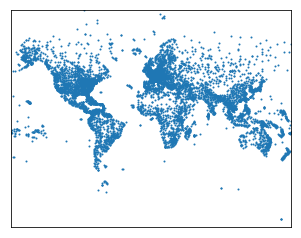

In [4]:
m.scatter(x,y,s=1)
plt.show()

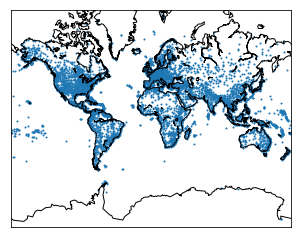

In [5]:
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

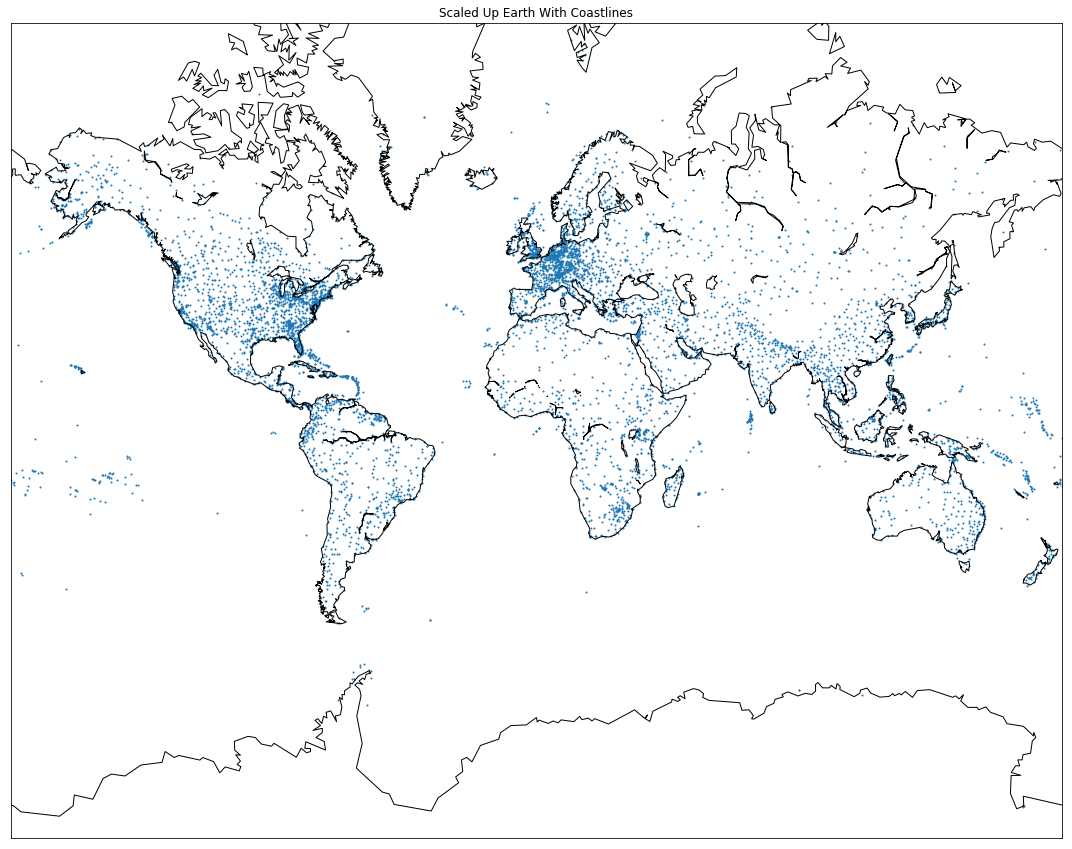

In [6]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")

m = Basemap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
x,y = m(airports["longitude"].tolist(),airports["latitude"].tolist())
m.scatter(x,y,s=1,ax=ax)
m.drawcoastlines()
plt.show()

In [7]:
geo_routes = pd.read_csv("data/geo_routes.csv")
#print(geo_routes.shape[0])
#geo_routes.dropna(inplace=True)
#print(geo_routes.shape[0])

print(geo_routes.head(5))

  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


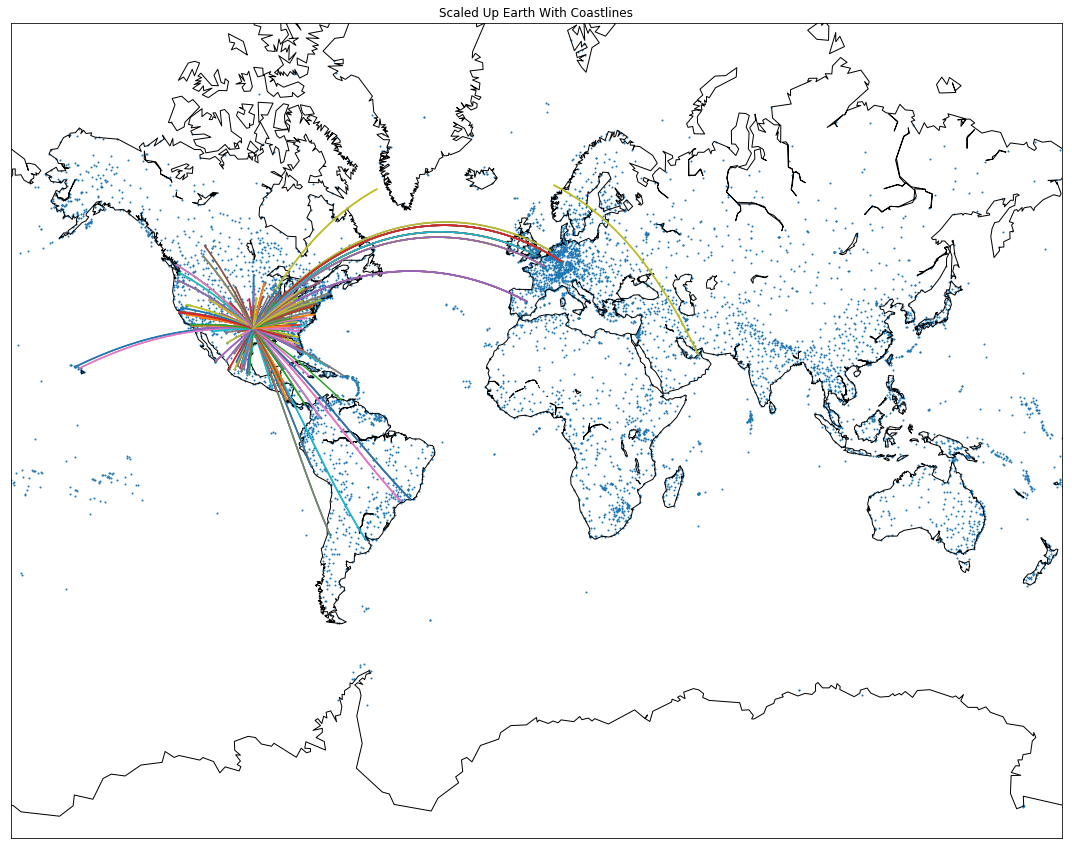

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def create_great_circles(route_df, basemap):
    for idx, series in route_df.iterrows():
        start_lat = series["start_lat"]
        end_lat = series["end_lat"]
        start_lon = series["start_lon"]
        end_lon = series["end_lon"]
        if ((abs(start_lat-end_lat) <= 180) and (abs(start_lon-end_lon) <= 180)):
            basemap.drawgreatcircle(lon1 = start_lon, lon2 = end_lon, lat1 = start_lat, lat2 = end_lat)
        
is_dfw = geo_routes["source"] == "DFW"
dfw = geo_routes[is_dfw]

m = Basemap(projection="merc",llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=80)
x,y = m(airports["longitude"].tolist(),airports["latitude"].tolist())

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x,y,s=1,ax=ax)
m.drawcoastlines()
create_great_circles(dfw, m)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

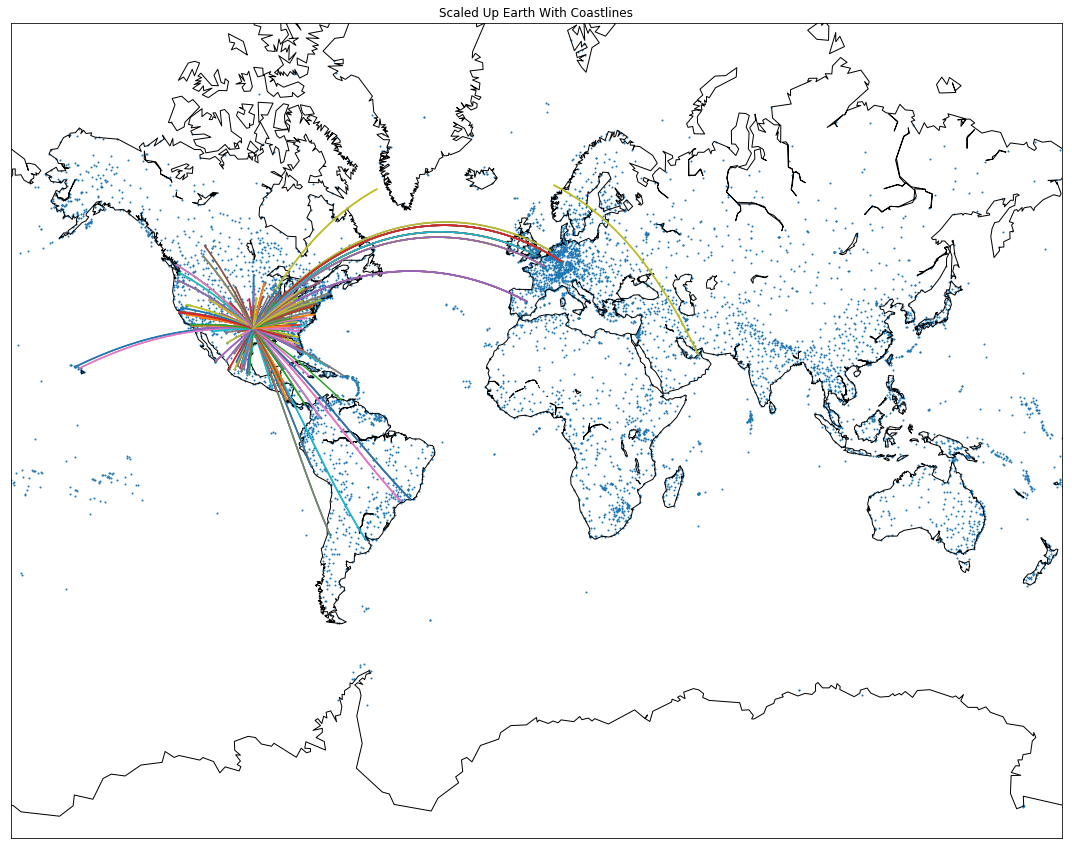

In [14]:
# doing the same as above but making my own geo_routes from routes.csv and airports.csv

my_geo_routes = routes[routes["source"]=="DFW"]

start_lon = []
start_lat = []
end_lon = []
end_lat = []
for idx, each in my_geo_routes.iterrows():
    start = each["source"]
    end = each["dest"]
    start_lon.append(airports[airports["code"] == start]["longitude"].values[0])
    start_lat.append(airports[airports["code"] == start]["latitude"].values[0])
    end_lon.append(airports[airports["code"] == end]["longitude"].values[0])
    end_lat.append(airports[airports["code"] == end]["latitude"].values[0])

my_geo_routes["start_lon"] = start_lon
my_geo_routes["start_lat"] = start_lat
my_geo_routes["end_lon"] = end_lon
my_geo_routes["end_lat"] = end_lat
#print(my_geo_routes)

def create_great_circles(route_df, basemap):
    for idx, series in route_df.iterrows():
        start_lat = series["start_lat"]
        end_lat = series["end_lat"]
        start_lon = series["start_lon"]
        end_lon = series["end_lon"]
        if ((abs(start_lat-end_lat) <= 180) and (abs(start_lon-end_lon) <= 180)):
            basemap.drawgreatcircle(lon1 = start_lon, lon2 = end_lon, lat1 = start_lat, lat2 = end_lat)

m = Basemap(projection="merc",llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=80)
x,y = m(airports["longitude"].tolist(),airports["latitude"].tolist())

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x,y,s=1,ax=ax)
m.drawcoastlines()
create_great_circles(my_geo_routes, m)